# Data preprocessing: PCA

**NOTEBOOK GOAL**: Aggregate features into meaningful Principal Components in order then, to discard those features modelled by the components.

**DATASET TRANSFORMATION**: `preprocessed_train.csv` >> `preprocessed_train_PCA.csv`


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set_context(rc={"font.family":'sans',"font.size":24,"axes.titlesize":24,"axes.labelsize":24})  

import warnings 
warnings.filterwarnings("ignore")

%matplotlib inline

In [19]:
df = pd.read_csv('./dataset/preprocessed_train.csv')

In [20]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523021 entries, 0 to 523020
Data columns (total 56 columns):
StoreID                        523021 non-null int64
Date                           523021 non-null object
IsHoliday                      523021 non-null int64
IsOpen                         523021 non-null int64
HasPromotions                  523021 non-null int64
StoreType                      523021 non-null object
AssortmentType                 523021 non-null object
NearestCompetitor              523021 non-null int64
Region                         523021 non-null int64
NumberOfCustomers              523021 non-null int64
NumberOfSales                  523021 non-null int64
Region_AreaKM2                 523021 non-null int64
Region_GDP                     523021 non-null int64
Region_PopulationK             523021 non-null int64
CloudCover                     523021 non-null float64
Events                         523021 non-null object
Max_Dew_PointC                 5230

In [21]:
    m = df.isnull().any()
    print("========= COLUMNS WITH NULL VALUES =================")
    print(m[m])
    print("========= COLUMNS WITH INFINITE VALUES =================")
    m = np.isfinite(df.select_dtypes(include=['float64'])).any()
    print(m[m])

========= COLUMNS WITH NULL VALUES =================
Series([], dtype: bool)
========= COLUMNS WITH INFINITE VALUES =================
CloudCover           True
Max_VisibilityKm     True
Mean_VisibilityKm    True
Min_VisibilitykM     True
Precipitationmm      True
MeanStoreSales       True
MeanRegionSales      True
D_DayOfWeek_cos      True
D_DayOfWeek_sin      True
dtype: bool


Normalization

In [22]:
df = df.reset_index()

In [23]:
import sklearn.preprocessing
features = ['Max_Dew_PointC','Max_Humidity','Max_Sea_Level_PressurehPa','Max_TemperatureC',
            'Max_Wind_SpeedKm_h','Mean_Dew_PointC','Mean_Humidity','Mean_Sea_Level_PressurehPa',
            'Mean_TemperatureC','Mean_Wind_SpeedKm_h','Min_Dew_PointC','Min_Humidity',
            'Min_Sea_Level_PressurehPa','Min_TemperatureC','Precipitationmm','Mean_VisibilityKm',
            'Events_Fog','Events_Hail','Events_Thunderstorm','Events_Rain','Events_Snow']
# Separating out the features
x = df.loc[:, features].values
x
# Separating out the target
y = df.loc[:,['NumberOfSales']].values
# Standardizing the features
x = sklearn.preprocessing.normalize(x,axis=0)
dff=pd.DataFrame(x)
dff

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.000133,0.001474,0.001402,0.000167,0.001216,-0.000161,0.001492,0.001403,0.000111,0.001692,...,0.001764,0.001406,0.000156,0.000000,0.000000e+00,0.000000,0.000000,0.0,0.001794,0.004919
1,0.000000,0.001282,0.001399,0.000417,0.000927,-0.000161,0.001329,0.001399,0.000333,0.001057,...,0.001461,0.001400,0.000156,0.000000,4.579126e-09,0.000000,0.000000,0.0,0.000000,0.004919
2,0.000000,0.001194,0.001393,0.000333,0.001332,-0.000161,0.001292,0.001395,0.000333,0.001057,...,0.001386,0.001398,0.000312,0.000000,9.158251e-09,0.000000,0.000000,0.0,0.001794,0.000000
3,-0.000399,0.001179,0.001395,0.000667,0.001100,-0.000646,0.001019,0.001395,0.000333,0.001057,...,0.000630,0.001396,-0.000156,0.000000,1.373738e-08,0.000000,0.000000,0.0,0.000000,0.000000
4,0.000000,0.001370,0.001392,0.000583,0.000927,-0.000484,0.001365,0.001394,0.000111,0.000529,...,0.001209,0.001396,-0.000781,0.000000,1.831650e-08,0.000000,0.000000,0.0,0.000000,0.000000
5,-0.000266,0.001370,0.001391,0.000917,0.001390,-0.000484,0.001183,0.001390,0.000444,0.001163,...,0.000655,0.001388,-0.000312,0.000000,2.289563e-08,0.000000,0.000000,0.0,0.000000,0.000000
6,-0.000133,0.001282,0.001381,0.001084,0.000811,-0.000323,0.001092,0.001379,0.000666,0.000846,...,0.000605,0.001377,-0.000312,0.000000,2.747475e-08,0.000000,0.000000,0.0,0.000000,0.000000
7,0.000266,0.001370,0.001370,0.001250,0.000927,-0.000161,0.001074,0.001368,0.000777,0.001057,...,0.000630,0.001366,-0.000156,0.000000,3.205388e-08,0.000000,0.000000,0.0,0.000000,0.000000
8,0.001063,0.001282,0.001361,0.001334,0.000753,0.000323,0.001001,0.001362,0.001221,0.000634,...,0.000706,0.001365,0.000937,0.000000,3.663301e-08,0.000000,0.000000,0.0,0.001794,0.000000
9,0.001063,0.001370,0.001361,0.001417,0.000811,0.001130,0.001292,0.001362,0.001332,0.001163,...,0.000932,0.001363,0.001094,0.000256,4.121213e-08,0.000000,0.000000,0.0,0.001794,0.000000


Performing normalization

In [24]:
from sklearn.decomposition import PCA

n_components=12
p_list = ['p'+str(x) for x in range(1, n_components+1)]
pca = PCA(n_components=n_components)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = p_list)

Computing variance

In [25]:
pca.explained_variance_ratio_

array([0.34353011, 0.1495864 , 0.11193294, 0.09998775, 0.08303745,
       0.07637587, 0.04887726, 0.03059759, 0.02675776, 0.01798872,
       0.00431633, 0.00262286])

These values represent the percentage of information each principal components provide

In [26]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
var1

array([34.35, 49.31, 60.5 , 70.5 , 78.8 , 86.44, 91.33, 94.39, 97.07,
       98.87, 99.3 , 99.56])

This array represents the total percentage of information available considering from 1 to n principal components

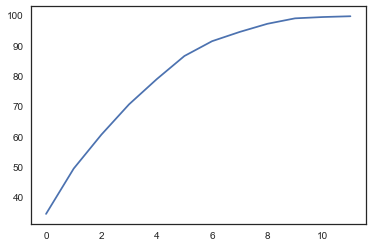

In [27]:
plt.plot(var1)

In [28]:
print(pd.DataFrame(pca.components_,columns=dff.columns,index = p_list))

           0         1         2         3         4         5         6   \
p1  -0.326708  0.002347  0.000340 -0.259337  0.008719 -0.392752  0.025563   
p2  -0.022149  0.007204 -0.001516 -0.077595  0.101050 -0.027802  0.034318   
p3   0.049240 -0.001209  0.000513  0.068234 -0.044287  0.054503 -0.020155   
p4  -0.007142  0.036165  0.001300 -0.021871 -0.136778 -0.011418  0.054300   
p5  -0.039300  0.005161  0.000063 -0.074825  0.022408 -0.050866  0.028512   
p6   0.129899  0.022858 -0.000462  0.042848 -0.089250  0.169213  0.039686   
p7  -0.047272 -0.038347  0.001807  0.178971 -0.132426 -0.076408 -0.133864   
p8   0.004818 -0.013247 -0.000267  0.039472  0.148613 -0.010787 -0.033865   
p9   0.023222 -0.045005 -0.001444  0.140432  0.551784 -0.035807 -0.123965   
p10  0.001079  0.051102  0.000164 -0.297295  0.122887  0.135670  0.231815   
p11  0.393937  0.176148 -0.000081  0.228733  0.479396  0.249035  0.136004   
p12 -0.408541 -0.059833 -0.001176 -0.148646  0.588684 -0.210874 -0.051270   

This values represent how the 18 attributes considered influence the weights
of the principal components vector

In [29]:
for x in features: 
    df = df.drop(x, 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523021 entries, 0 to 523020
Data columns (total 36 columns):
index                          523021 non-null int64
StoreID                        523021 non-null int64
Date                           523021 non-null object
IsHoliday                      523021 non-null int64
IsOpen                         523021 non-null int64
HasPromotions                  523021 non-null int64
StoreType                      523021 non-null object
AssortmentType                 523021 non-null object
NearestCompetitor              523021 non-null int64
Region                         523021 non-null int64
NumberOfCustomers              523021 non-null int64
NumberOfSales                  523021 non-null int64
Region_AreaKM2                 523021 non-null int64
Region_GDP                     523021 non-null int64
Region_PopulationK             523021 non-null int64
CloudCover                     523021 non-null float64
Events                         52302

In [30]:
finalDf=pd.concat([df,principalDf],axis=1)
finalDf

,index,StoreID,Date,IsHoliday,IsOpen,HasPromotions,StoreType,AssortmentType,NearestCompetitor,Region,...,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12
0,0,1000,01/03/2016,0,1,0,Hyper Market,General,326,7,...,-0.000763,-0.000913,-0.002226,0.002242,-0.000720,-0.001161,0.000247,-0.000133,-0.000345,-0.000043
1,1,1000,02/03/2016,0,1,0,Hyper Market,General,326,7,...,-0.000480,-0.000547,-0.002470,0.002301,0.001079,-0.001190,0.000050,0.000141,-0.000294,0.000167
2,2,1000,04/03/2016,0,1,0,Hyper Market,General,326,7,...,-0.000370,-0.000560,0.000554,-0.001106,-0.000526,-0.001300,-0.000166,-0.000515,-0.000338,0.000414
3,3,1000,05/03/2016,0,1,0,Hyper Market,General,326,7,...,-0.000204,-0.000258,0.000438,-0.001455,0.001392,-0.001173,0.000203,-0.000551,-0.000326,0.000250
4,4,1000,06/03/2016,0,0,0,Hyper Market,General,326,7,...,-0.000228,0.000052,0.000510,-0.001353,0.001214,-0.001374,-0.000511,-0.000226,0.000393,0.000028
5,5,1000,07/03/2016,0,1,1,Hyper Market,General,326,7,...,-0.000171,-0.000311,0.000404,-0.001347,0.001290,-0.001128,0.000372,-0.000353,0.000050,0.000292
6,6,1000,08/03/2016,0,1,1,Hyper Market,General,326,7,...,-0.000085,-0.000192,0.000326,-0.001209,0.001487,-0.001246,-0.000064,-0.000653,-0.000044,0.000007
7,7,1000,09/03/2016,0,1,1,Hyper Market,General,326,7,...,-0.000023,-0.000307,0.000255,-0.001034,0.001395,-0.001193,0.000125,-0.000469,0.000078,-0.000106
8,8,1000,10/03/2016,0,1,1,Hyper Market,General,326,7,...,-0.000015,-0.000647,0.000168,-0.000540,-0.000026,-0.001330,-0.000295,-0.001379,-0.000204,-0.000048
9,9,1000,11/03/2016,0,1,1,Hyper Market,General,326,7,...,-0.000018,-0.000792,0.000233,-0.000106,-0.000303,-0.001289,-0.000152,-0.000605,-0.000213,-0.000168


In [31]:
finalDf.head()

,index,StoreID,Date,IsHoliday,IsOpen,HasPromotions,StoreType,AssortmentType,NearestCompetitor,Region,...,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12
0,0,1000,01/03/2016,0,1,0,Hyper Market,General,326,7,...,-0.000763,-0.000913,-0.002226,0.002242,-0.000720,-0.001161,0.000247,-0.000133,-0.000345,-0.000043
1,1,1000,02/03/2016,0,1,0,Hyper Market,General,326,7,...,-0.000480,-0.000547,-0.002470,0.002301,0.001079,-0.001190,0.000050,0.000141,-0.000294,0.000167
2,2,1000,04/03/2016,0,1,0,Hyper Market,General,326,7,...,-0.000370,-0.000560,0.000554,-0.001106,-0.000526,-0.001300,-0.000166,-0.000515,-0.000338,0.000414
3,3,1000,05/03/2016,0,1,0,Hyper Market,General,326,7,...,-0.000204,-0.000258,0.000438,-0.001455,0.001392,-0.001173,0.000203,-0.000551,-0.000326,0.000250
4,4,1000,06/03/2016,0,0,0,Hyper Market,General,326,7,...,-0.000228,0.000052,0.000510,-0.001353,0.001214,-0.001374,-0.000511,-0.000226,0.000393,0.000028


In [32]:
finalDf.drop(['index'],inplace=True,axis=1)

In [33]:
finalDf.shape

(523021, 47)

In [34]:
finalDf.to_csv('./dataset/preprocessed_train_PCA.csv')